# Stage 1 - Literature review
In notebooks 1 and 2, we managed to extend the dataset we received from SP, with data from our internal TED database. We showed that this data resulted in many changes of SKU demand class, which is problematic. 
A rough outline of steps in the project is as follows:
1. EDA 
2. Benchmark Slim4 prediction performance (requires data extraction). 
3. Implement literature methods with extended dataset, test performance against Slim4. 
4. Attempt to improve upon literature methods via:
    i. Correlation across SKUs? 
    ii. Trend input? 
    iii. Seasonality? 
    iv. Advanced ML methods? 
Regarding 4. Slim4 already implements some of them.   

Due to people being on holiday, we can't get the required data extractions from Slim4. So instead let's move onto revisiting the literature methods, and trying to improve them, by digging into ML:

List of models attempting to tackle intermittent demand prediction:
1. Croston's method
2. Single Exponential Smoothing (SES)
3. Syntetos-Boylan Approximation (SBA)
4. Teunter-Syntetos-Babai (TSB)
5. Hyperbolic-Exponential Smoothing (HES)
6. Modified SBA 
7. Leven (in Kaya_20)
8. Vinh (in Kaya_20)
9. Bootstrap? (willemain_04)

Analytical forms of all these models are available, and implementing them on our Sealing and Polymer dataset should be easy enough. But what about all the methods available amongst ML? Every product has multiple other fields (features in ML), which could aid prediction of demand, and it just seems like a problem amenable to ML. Let's take a look...

Side note: Kaya_20 is a perfect example of how to run such a model horse race! 

## ML methods:
Resources:
1. Decision Trees in intermittent demand forecasting - https://www.linkedin.com/pulse/machine-learning-supply-chain-forecast-nicolas-vandeput/  
    i. Fairly intuitive, decision trees also seen a lot of success. But does it deal with intermittent demand? I don't see any sign of this. 
2. Croston + TSB Python implementations - https://towardsdatascience.com/croston-forecast-model-for-intermittent-demand-360287a17f5f
3. GLMs with Exponential Smoothing - http://papers.nips.cc/paper/6313-bayesian-intermittent-demand-forecasting-for-large-inventories.pdf  
    i. Tentative. Better performance for fast and medium pace items, but slower moving ones, performance comparable to exponential smoothing. 
4. Nearest neighbour approaches - https://www.sciencedirect.com/science/article/pii/S0925527316300391
    i. Only seems to be of use if some underlying pattern known to exist. Not the case for us. 
5. Initial NN attempt - https://www.sciencedirect.com/science/article/pii/S0925527313000273?via%3Dihub
6. Another NN attempt - https://www.sciencedirect.com/science/article/pii/S0925527316303176?via%3Dihub
7. Not ML, but binning thoughts - https://www.sciencedirect.com/science/article/pii/S0377221720304926?via%3Dihub
8. V early NN attempt, with positive results - https://www.sciencedirect.com/science/article/pii/S0925527307000540
9. Babai_20 - very recent NN overview paper in intermittent demand
    1. Bootstrap can't undergo forecast accuracy calcs? Creates demand distribution? 
    2. SES was very good. 
    3. Look at the performance of NN, parametric and bootstrap methods for each demand class. Can we place recommendations on which model to use for each demand class?
        a. Specifically, can we show, through a big horse race, that an alternative method beats Slim4's black box for a particular demand class? 
    4. Use multiple error measures
    5. NN methods:  
        a. Gutierrez 08     
        b. Lolli_17 - outperform Croston and SBA 
        c. Babai_20     
        d. Nasiri Pour 08 - not discussed in Babai_20   
        e. Kourentzes_13 - not successful   
    6. Note paragraph on temporal aggregations (day/week/month) on p4. 
    7. Gutierrez finds better performance than SES, SBA and Croston. 
10. Turkmen_20 - https://arxiv.org/pdf/2010.01550.pdf  
    i. RNNs with discrete time renewal processes seem to be good. Particularly RNNs.   
    ii. RNNs in Lolli_17??   
    iii. Deep LSTM -   
    iv. https://deep-and-shallow.com/2020/10/13/intermittent-demand-forecasting-with-deep-renewal-processes/ 
        a. Blog post discussing Turkmen! 
11. Salinas_20 - BIG - Uses information from similar SKUs to enhance forecast. 
Keep reading through google search of "Intermittent demand forecasting neural networks", specifically Scholar search. 
https://scholar.google.nl/scholar?start=10&q=intermittent+demand+forecast+neural+networks+&hl=en&as_sdt=0,5&as_ylo=2020&as_vis=1

12 . Benidis_20 - https://arxiv.org/pdf/2004.10240.pdf - review of Neural forecasting, + Salinas methods? Amazon Research again.   
Thought: Is the problem of demand prediction the same as time series forecasting? At each timestep, we have a sequence of non-zero values for consumption, and we have a series of non-zero values for orders. Each SKU has two separate time series, and it also has a vast number of features. The problem is to predict the values of the two time series, given the time series, but also given the features available for each SKU.   
    i. 4.4 = NNs for intermittent demand:   
    ii. Gutierrez and Kourentzes only offer point forecasts. This is improved by Turkmen via renewal processes.   
    iii. Turkmen uses RNNs to 'modulate both discrete-time and continuous-time' processes. RNNs can replace exponential smoothing?   
    iv. Hongyuan Mei and Jason M. Eisner. The neural hawkes process: A neurally self-modulating multivariate point process. In Advances in Neural Information Processing Systems, pages 6754{6764, 2017  
        a. This paper combines Hawkes processes and NNS?   
    v. Xiao - Two RNNs to parametrize probabilistic point porcess. Idea of event sequences on top of time series data? Flash sales for instance? Or for me, fifa card releases?   
    vi. Salinas_20 adds metadata for each product in input vector! Look at DeepAR again.   
    vii. Mukherjee_18 related to Salinas_20   
    viii. Kourentzes_13, Xiao_17 (Attentional twin RNNs), Gutierrez_08, Turkmen_19 should be a focused list.   
    
13. DeepAR in Kaggle M5 comp:  
    i. https://www.kaggle.com/c/m5-forecasting-accuracy/discussion/164374
    

https://www.connectedpapers.com/main/4eebe0d12aefeedf3ca85256bc8aa3b4292d47d9/DeepAR-Probabilistic-Forecasting-with-Autoregressive-Recurrent-Networks/derivative

14. Salinas implementation (2017) - https://gluon-ts.mxnet.io/api/gluonts/gluonts.model.deepar.html
 i. https://ts.gluon.ai/examples/basic_forecasting_tutorial/tutorial.html
15. M5 forecasting comp 2nd place - DeepAR - https://github.com/Mcompetitions/M5-methods/blob/831984de96626ca53024bcd33ec3cdb7f9af483d/Code%20of%20Winning%20Methods/A2/Documentation_v01.pdf

16. Spilotis_20 - Review of M5 forecasting comp results. 


### Gutierrez NN
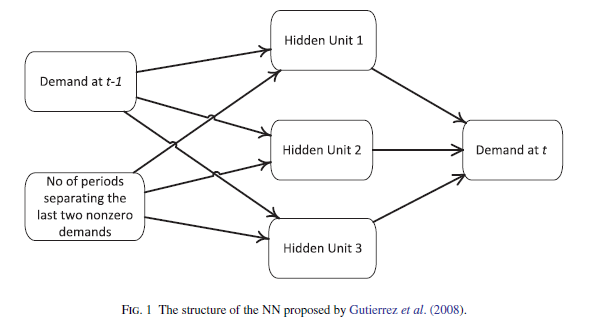

Two inputs:
1. Demand at t-1 
2. Number of periods between last two non-sero demand intervals 

### Babai proposed method:
Inputs of two types:
1. LagN - demand at (t-N) timesteps 
2. Number of periods separating last two non-zeros and number of periods separating (t) and first zero demand.

H=3 hidden units. 

123 data points used. More than us, at around 50 max. Move to weekly? 
Careful analysis of parametric performances as we vary param are needed. 
Two error measures - sMSE and MASE. 
Re-order policies takes some more thinking. 

## Non-ML methods review:

Terms:
1. $D_t$: Demand for an item at time $t$  
2. $D'_{t}$: Estimate of mean demand per period made at time $t$ for period $t+1$
3. $Z_t$: Actual demand size at time $t$
4. $Z'_t$: Estimate of the demand size at time $t$
5. $T_t$: Actual demand interval at time $t$
6. $T'_t$: Estimate of the demand interval at time $t$
7. $p'_t$: Estimate of the demand occurence probability at time $t$ 
8. $\alpha, \beta$: Smoothing parameters ($0 \leq \alpha \leq 1, 0 \leq \beta \leq 1$)

So $D$ represents a measure of 'mean demand per unit time'.  
$Z$ represents the demand size at any timestep $t$, i.e. how much was ordered at any timestep.   
$T$ represents the demand interval at time $t$. 

### <font color=red>Croston's Method</font>:
1.  __$D_t$ only updated when there is positive demand.__
\begin{equation}
    D'_t = \frac{Z'_t}{T'_t}, 
\end{equation}
2. The above equation says that the estimated demand is just the estimated demand size divided by the estimated demand interval. So how are these two quantities calculated?
3. Well, if $D_t > 0$:
\begin{equation}
\begin{split}
    Z'_t = Z'_{t-1} + \alpha(Z_t - Z'_{t-1}), \\
    T'_t = T'_{t-1} + \beta(T_t - T'_{t-1}).
\end{split}
\end{equation}
4. But otherwise (if $D_t = 0$):
\begin{equation}
\begin{split}
    Z'_t = Z'_{t-1}, \\
    T'_t = T'_{t-1}.
\end{split}
\end{equation}
5. Note, Croston initially suggested setting $\alpha$ and $\beta$ to the same value, but Babai_19 explores breaking this assumption. 

### <font color=green>Single Exponential Smoothing</font>:
\begin{equation}
    D'_t = D'_{t-1} + \alpha\sum_{i=0}^{\infty} (1 - \alpha)^i D_{t-i},
\end{equation}
1. This allows us to forecast demand at the end of every timestep. Information from earlier simply set to decay, weight datapoints closer more. 

### <font color=red>Syntetos-Boylan Approximation (SBA)</font>
1. SBA's key contribution is to show that Croston's method consistently over-estimates mean demand, and then to implement a correction:
\begin{equation}
    D'_t = \Big(1 - \frac{\beta}{2}\Big)\frac{Z'_t}{T'_t}.
\end{equation}
2. Otherwise, the SBA method also utilises equations 2 and 3 from Croston's method. i.e. the SBA method uses two different exponentially smoothed estimates of demand sizes ($D_t$) and demand intervals ($T_t$). 

### <font color=green>Teunter-Syntetos-Babai (TSB) method:</font>
1. Mainly to deal with obsolescence (many zero demand timesteps). 
2. Instead of predicting demand intervals $T$, it predicts $p$, which is a probability of demand occuring at any timestep $t$. 
\begin{equation}
    D'_t = p'_tZ'_t,
\end{equation}

3. If $D_t > 0:$
\begin{equation}
\begin{split}
    Z'_t = Z'_{t-1} + \alpha(Z_t - Z'_{t-1}), \\
    p'_t = p'_{t-1} + \beta(1 - p'_{t-1}).
\end{split}
\end{equation}
4. Otherwise:
\begin{equation}
\begin{split}
Z'_t = Z'_{t-1}, \\
    p'_t = p'_{t-1} + \beta(-p'_{t-1}).
\end{split}
\end{equation}

### <font color=green>Hyperbolic Exponential Smoothing:</font>
1. Novelty - Forecasts decay hyperbolically during periods of no demand (rather than exponentially, or not at all). 
2. Come back to. 


### <font color=green>Modified SBA </font>
1. Intuition - in periods with positive demand, behaves like SBA. Updates demand sizes, demand intervals exactly like SBA. 
2. But in any period with zero demand, if the actual demand interval becomes higher than the last estimated demand interval, the update becomes similar to the TSB probability of occurence method. 
\begin{equation}
    D'_t = \Big(1 - \frac{\beta}{2}\Big)\frac{Z'_t}{T'_t}.
\end{equation}
3. Where, if $D_t > 0$:
\begin{equation}
\begin{split}
    Z'_t = Z'_{t-1} + \alpha(Z_t - Z'_{t-1}), \\
    T'_t = T'_{t-1} + \beta(T_t - T'_{t-1}).
\end{split}
\end{equation}
4. Otherwise: 
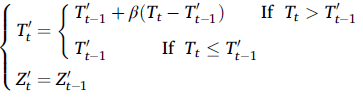
5. The key point is if the probability of zero demand timesteps (obsolescence) increases, the demand intervals observed tend to increase. This feature can't be captured by the Croston and SBA methods, as they only update demand sizes and intervals __after__ demand occurs in some timestep. 

### Leven method 
1. From Kaya_20:
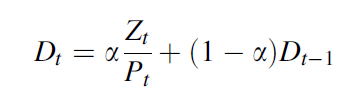
2. But note, $P_t$ = $T_t$ in the notation above. 
3. So first term is a fraction of demand size estimate / demand interval estimate 
4. Second term is similar to SBA. 
5. Kaya_20 also took the original form of Croston's work, and not the bivariate version ($\alpha$ and $\beta$)

### Vinh method 
1. Variant of Croston. 
2. Mean demand per period is forecasted by exponentially weighting last two values:
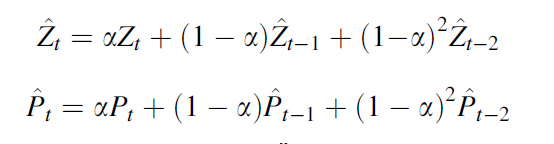
3. Again, $P_t$ = $T_t$, as from Kaya_20

### <font color=green>Bootstrap method: </font>


1. Look to predict up to $T+L$, where $L$ is the fixed lead time (time from product order from supplier to delivery at warehouse). 
2. Withhold last $L$ data points. 
3. Sample with replacement from individual observations (does this mean from each product's demand history?) 
4. Three features dealt with:  
    i. Autocorrelation  
    ii. Frequent repeated values  
    iii. Relatively short series   
5. Autocorrelation modelled with two-state, first order Markov process. 
6. Steps:  
    i. Get historical demand data in chosen time bucket (weeks, months etc).  
    ii. Estimate transition probabilities via two-state (zero vs non-zero) Markov model.   
    iii. Conditional on last observed demand, use Markov model to generate sequence of zeros/non-zeros over forecast horizon.   
    iv. Replace every nonzero data point with a numerical value sampled at random with replacement from the set of observed non-zero demands.   
    v. Jitter the non-zero demand values.   
    vi. Sum the forecast values over the lead time horizon to get one predicted value for lead-time demand (LTD). This allows a company to order the product in advance.   
    vii. Repeat steps ii - v many times   
    viii. Sort and use the resulting distribution of LTD values.  
7. Mentioned in conclusion that __doubly-stochastic Poisson process__ models could be very good competitors to bootstrap approach. 

### Ord_20
Exp smoothing + Negative binomial! 
Looks to be v simple + effective method, quoted in 1.1.3 GLM paper above. 

## Assessing forecast accuracy:
1. Kaya_20   
    i. Huge performance improvement for lumpy via Vinh and Leven, in comparison to Croston and SBA   
    ii. Error measure = GMA-MSE 
2. Willemain_04 

## To do: 
1. Email Michael Weerman - Procurement S+P. 
2. Get Slim4 data from Hans:
    i. Classifications for each SKU. 
    ii. Forecast histories. 
3. Benchmark classification. (1)
4. Benchmark forecasting. (1)
5. Implement literature methods. (1)
6. Implement advanced literature methods. (1)
7. Build dashboard. (2)
8. Write report. (6)

Days left (9 Oct 2020 - 11 Dec 2020) - 18 



Reading list:
1. Bootstrap review - https://www.tandfonline.com/doi/full/10.1080/00207543.2018.1424375
    i. 
2. Kaya_20
3. https://www.youtube.com/watch?v=i40Road82No  
    i. Look at RNN and LSTM 
4. https://www.youtube.com/watch?v=vdERjN-NAUc


# Benchmarking Classification
1. Data required - Slim4 SKU classifications (Normal, Irregular main ones). 
2. Double check Slim4 groupings (Irregular = Intermittent + Lumpy + Erratic, Normal = Smooth). If true, replicate binnings manually via literature ADI and CV_2 calcs. 
3. Analyse differences between binning for each SKU. 
4. For SKUs which change classification, look at forecast performance. 
5. Will act as a rough measure of the state of the Slim4 classification. 
4. Point - does classification change over time? If so, what do we do? 
    i. For now, let's say it doesn't. 

# Implementing literature methods
1. Write a function for each model, whereby:  
    i. Input = time series of demand sizes + dates.   
    i. Output = prediction of demand sizes and dates for some input time horizon.   
    

# Chat with Michael Weerman:
Q's:
1. Work process from Slimstock. 
2. Current team + problems + work. 
3. Things you need the most, re demand prediction improvement? 

Procurement classicaly reactive. Responsibilities still to be defined. 
S+P proc = 10 people. Sales admin, returning products etc. 
Remaining 9, 3 categories, o-rings, dynamic seals, come in bulk from Asia. 3rd = technical rubber, moulded rubber. 
moulded = cust spec. 4 people in moulded rubber. 1st time right essential in OEM. Crucial to get right. 
Groups - purchasers, expediters, expediters take care of timely delivery. Challenge suppliers to meet deliv times. 
Some focus areas for purchasers too, also need to evaluate supplier performance. 
Lead buyers should periodically review supplier performance. Rather than reactively. 
Focus area for suppliers to get contract with ERIKS. 
Also take care of qualiy issues. Supporting sales division by streamling acquirement process. 
Purchasers key? Yes. What info? 
1. Input from customer first. Sales responsible for this, planning forecast etc. 
2. Then transferred to stock control management. 
3. Output is what we need to order. If no cust planning, no output. Prev, based on historical use, cust should use. But we stocked the product. So cust spec is tough. More focusing on what cust is truly needing. What does Slim do with it? 
4. A lot of communicatio with sales, to get cust info. Then also with stock management, re params. What are these param? 
5. They don't really determine quantities, they can influence, but main decision between sales and stock control management. 
6. Need to authorise orders above a certain value. 
7. If approached by a sales guy, to stock something, now need to question it. Why take one years stock, if not comitted? 


Q's:
1. params?
2. cust spec vs non cust spec  
    i. Big influence from cust spec? In value?   
    ii. Current discussion, whether cust spec should run on slim.   
    iii. cust spec, manual monitoring of system. Don't trust slim.   
    iv. For standard, with no deliv schedules. Fine to use slim.   
    v. What about irregular products in standard items?   
    vi. With cust spec, can't fix quick. With non cust-spec, can't.   
    vii. non-cust spec irregular not on mind as much as cust spec.   
    viii. cust spec more valuable.   
    ix. non-cust spec more reliable in quality, can easily be done.   
    x. Cust spec really is key. More value, can fined.   
    xi. Standard stock items, okay to do that. Hard to look ahead for cust spec items.   
    xii. Not a fan of slimstock for non-cust spec.  
    xiii. Perhaps chat to stock management instead?   
    xiv. 

Eveline meeting: 

Logistics in alkmaar - people for packaging.   
How many delivery lines in upcoming week.   
deliv lines v closely related to order lines.   
orderlines processed to logistics. deliv line has 10k screws etc.  
20k needed, 10k sent. Need to order rest.   
Orders placed a few weeks ago, plus orders that week, need to predict them.   
Split analysis into prediction of order lines, then prediction of delivery lines.   
Regression, other things, time series models, worked in Azure AutoML, threw in data, get recommendations.   
Now trying to do order line prediction.   


# Chat with Joppe and Hans 


1. Benchmarking Slim4
2. Dashboard/end deliverable to assist your team, in decision making? 
3. Chat with Procurement - Michael Weerman 


Use snapshots for historical data.  
Call Slim4, relay response to Joppe and Hans 
They always work with planning profiles 
A lot of cust spec articles, run through slimstock. Q4/Q1, peaks in demand. 
Past demand broken up by demand per customer. 
Dynamic seals.
Irregular, A article, important. 
Currently, lot of stock for flow, in 18/19, not good selling due to not on stock. 
Life cycles of a product, can't see data on it. 
Items go into another item. 
Within Slim4, no links between SKUs. 
We use 12 months history to forecast, with normal running items, not a problem, but for slow and irregulars, 12 months may be too short. To make a good forecast. Atm, can choose number of months of history to take into acccount. But then you take that number of months for all items. 
Compare Iron products, thousands of them. 
Iron buffer stock, reorder point flies up and down. How to forecast with projects. 
External company projects make re-order point fly around, but safety stock not the solution, raises working capital. 
BU Flow particularly has trouble. 


To do: 
1. Make sharepoint for Joppe to upload snapshot files to. 
2. Contact Slim4 helpdesk about making this deviations extract from Slim4. 
3. Organise meeting with D+A to discuss this? 
4. Contact Johan to discuss these ideas. 

# Bootstrap review - Hasni_19

1. Block bootstrap samples blocks of data, and blocks pasted in. 
2. WSS seems to a good first approach into the bootstrap. Perhaps extend with ideas via Cristian (correlation?). 
3. Key idea is that we want to utilise demand histories from other products also. Embedding this in the bootstrap approach will require some work, adapting existing methods, but it's readily available in Deep and LightGBM seemingly. 
4. Implement base boostrap, then look at DeepAR? 